In [19]:
from langgraph.graph import StateGraph, START, END
from pydantic.v1.fields import FieldInfo as FieldInfoV1
from typing import TypedDict
from langchain_google_genai import GoogleGenerativeAI
from dotenv import load_dotenv

In [20]:
load_dotenv()  # take environment variables from .env file

True

In [21]:
model = GoogleGenerativeAI(model="gemini-3-flash-preview")

In [ ]:
res = model.invoke("Write a short poem about the sea.")
print(res)

In [24]:
#create state
class LLMState(TypedDict):

    question: str
    answer: str

In [25]:
def llm_reqRes(state: LLMState) -> LLMState:

    question = state['question']
    prompt = f"answer the given question: {question}\nA:"

    answer = model.invoke(prompt)

    state['answer'] = answer
    return state

In [26]:
graph = StateGraph(LLMState)
graph.add_node('llm_qa', llm_reqRes)

graph.add_edge(START, 'llm_qa')
graph.add_edge('llm_qa', END)
workflow= graph.compile()

In [29]:
#execute graph
initial_state = {"question": "What is the capital of France?and tell me more about its capital city."}
final_state = workflow.invoke(initial_state)
print(final_state['answer'])  # Should contain the answer to the question

The capital of France is **Paris**.

Known as "The City of Light" (*La Ville Lumière*), Paris is one of the most iconic and influential cities in the world. Here is more information about it:

### 1. Geography and Layout
Paris is located in the north-central part of France along the **Seine River**. The city is uniquely organized into 20 administrative districts called **arrondissements**, which spiral outward from the center like a snail shell. The Seine divides the city into the "Left Bank" (traditionally associated with intellectuals and artists) and the "Right Bank" (traditionally associated with commerce and business).

### 2. Iconic Landmarks
Paris is home to some of the world's most recognizable structures:
*   **The Eiffel Tower:** Originally built for the 1889 World’s Fair, it is now the global symbol of France.
*   **The Louvre Museum:** The world's largest art museum and home to the *Mona Lisa*.
*   **Notre-Dame Cathedral:** A masterpiece of French Gothic architecture (curre

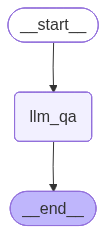

In [30]:
workflow